Calculate the Bayes Factor for $u-r$ to determine whether the void and wall samples are drawn from the same or different parent distributions.

In [1]:
from astropy.table import Table
from astropy.io import fits

import numpy as np

import sys

import pickle

import pocomc as pc

import matplotlib
import matplotlib.pyplot as plt

from functions import Model_1_plot, Model_2_plot

np.set_printoptions(threshold=sys.maxsize)

In [2]:
matplotlib.rc('font', size=14)
matplotlib.rc('font', family='DejaVu Sans')

# Data

In [3]:
#data_directory = '../../../../data/'
data_directory = '../../../../Data/NSA/'
data_filename = data_directory + 'NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdu = fits.open(data_filename)
data = Table(hdu[1].data)
hdu.close()

## Just keep the main SDSS DR7 footprint

In [4]:
# When the catalog is the NSA, only keep those objects which were originally in the DR7 LSS
catalog_SDSS = data[data['IN_DR7_LSS'] == 1]

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250, 
                                       catalog_north['RA'] < 269, 
                                       catalog_north['DEC'] > 51, 
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]

In [5]:
ur_NSA = np.array(catalog_main['u_r'])

## Separate galaxies by their LSS classifications

### $V^2$

In [6]:
wall_v2 = catalog_main['vflag_V2'] == 0
void_v2 = catalog_main['vflag_V2'] == 1
edge_v2 = catalog_main['vflag_V2'] == 2
out_v2 = catalog_main['vflag_V2'] == 9

### VoidFinder

In [7]:
wall_vf = catalog_main['vflag_VF'] == 0
void_vf = catalog_main['vflag_VF'] == 1
edge_vf = catalog_main['vflag_VF'] == 2
out_vf = catalog_main['vflag_VF'] == 9

In [8]:
del catalog_main, catalog_north, data

# Fit the color distributions with skewnormal distributions

Both one- and two-parent models

This is a bimodal distribution

In [9]:
#ur_bins = np.linspace(0, 4, 170)
ur_bins = np.arange(0.5, 4, 0.05)

## V$^2$

### 1-parent model

In [16]:
temp_infile = open('pocoMC_results/sampler_results_M1_u-r_V2.pickle', 'rb')
V2_results1 = pickle.load(temp_infile)
temp_infile.close()

In [17]:
labels1_bi = ['s', 'a', r'$\mu_a$', r'$\sigma_a$', 'skew$_a$', 
                   'b', r'$\mu_b$', r'$\sigma_b$', 'skew$_b$']
labels2_bi = ['$a_1$', r'$\mu_{1a}$', r'$\sigma_{1a}$', 'skew$_{1a}$', 
              '$b_1$', r'$\mu_{1b}$', r'$\sigma_{1b}$', 'skew$_{1b}$', 
              '$a_2$', r'$\mu_{2a}$', r'$\sigma_{2a}$', 'skew$_{2a}$', 
              '$b_2$', r'$\mu_{2b}$', r'$\sigma_{2b}$', 'skew$_{2b}$']

labels1_tri = ['s', 'a', r'$\mu_a$', r'$\sigma_a$', 'skew$_a$', 
                    'b', r'$\mu_b$', r'$\sigma_b$', 'skew$_b$', 
                    'c', r'$\mu_c$', r'$\sigma_c$', 'skew$_c$']
labels2_tri = ['$a_1$', r'$\mu_{1a}$', r'$\sigma_{1a}$', 'skew$_{1a}$', 
               '$b_1$', r'$\mu_{1b}$', r'$\sigma_{1b}$', 'skew$_{1b}$', 
               '$c_2$', r'$\mu_{1c}$', r'$\sigma_{1c}$', 'skew$_{1c}$', 
               '$a_2$', r'$\mu_{2a}$', r'$\sigma_{2a}$', 'skew$_{2a}$', 
               '$b_2$', r'$\mu_{2b}$', r'$\sigma_{2b}$', 'skew$_{2b}$', 
               '$c_2$', r'$\mu_{2c}$', r'$\sigma_{2c}$', 'skew$_{2c}$']

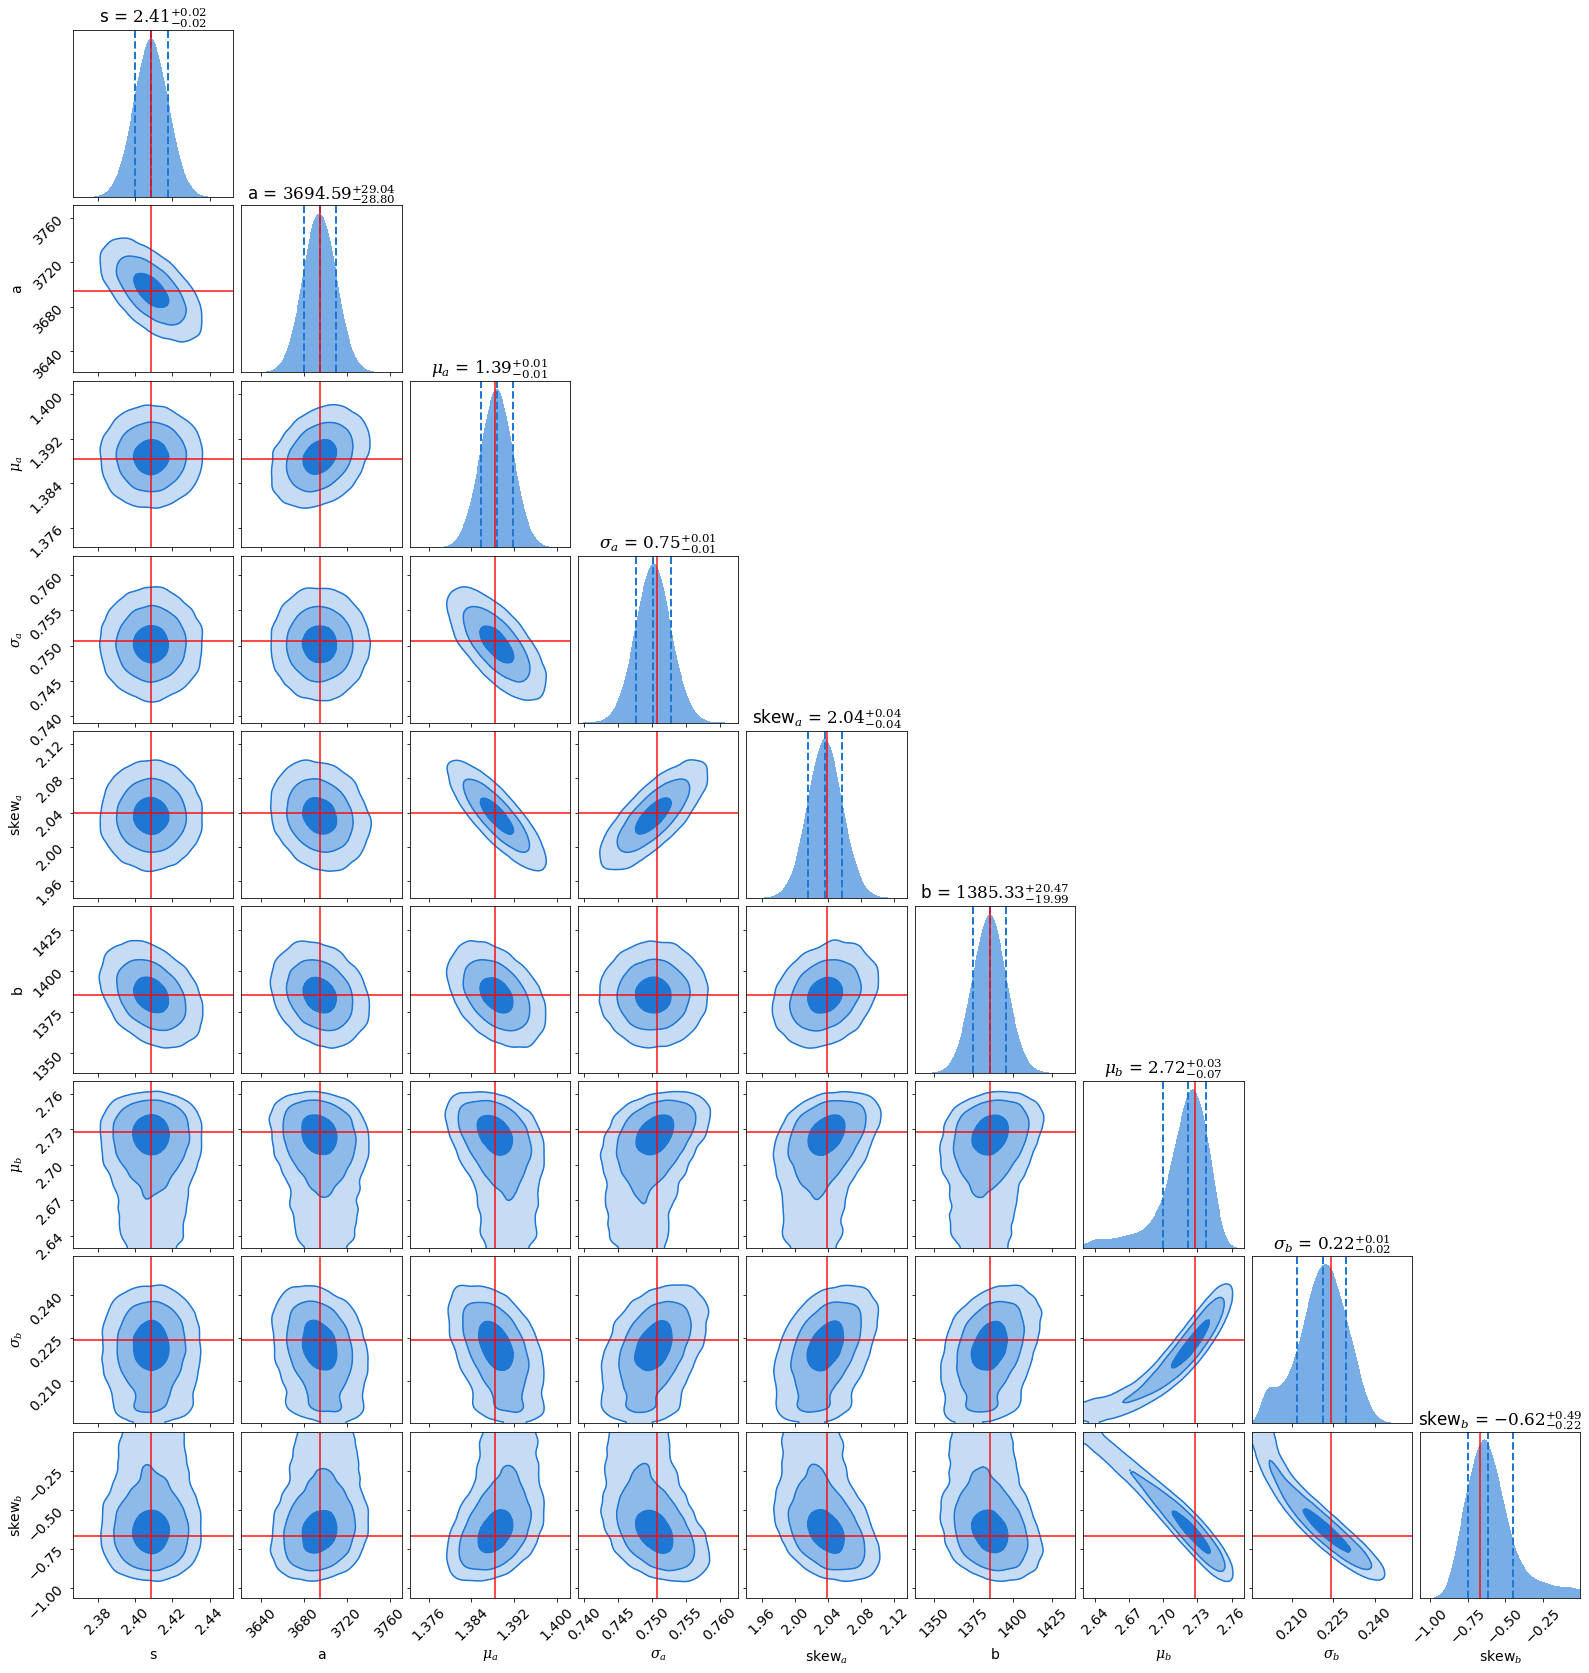

In [18]:
pc.plotting.corner(V2_results1, 
                   labels=labels1_tri, 
                   dims=range(len(labels1_tri)), 
                   show_titles=True, 
                   quantiles=[0.16, 0.5, 0.84])

In [20]:
lnzM1_V2 = V2_results1['logz'][-1]
lnzM1_V2

-1303.1681428575446

In [22]:
V2_ur_bestfit1 = np.mean(V2_results1['samples'], axis=0)

V2_ur_bestfit1

array([ 2.40867498e+00,  3.69464498e+03,  1.38872933e+00,  7.50215457e-01,
        2.03631353e+00,  1.38532614e+03,  2.71754760e+00,  2.20666663e-01,
       -5.91662197e-01])

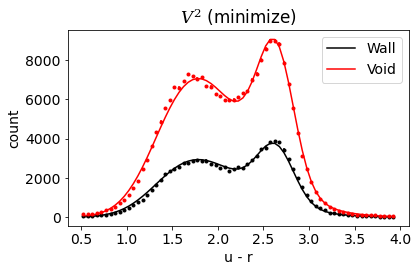

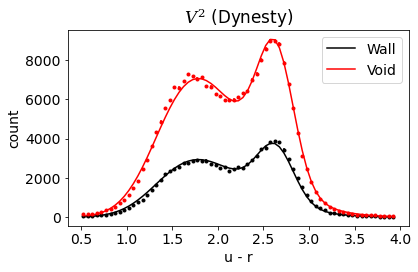

In [23]:
Model_1_plot(V2_ur_bestfit1, 
             ur_NSA[wall_v2], 
             ur_NSA[void_v2], 
             ur_bins, 
             3, 
             xlabel_text='u - r', 
             title_text=r'$V^2$ $\mathcal{M}_1$ (pocoMC)')

### 2-parent model

In [25]:
temp_infile = open('pocoMC_results/sampler_results_M2_u-r_V2.pickle', 'rb')
V2_results2 = pickle.load(temp_infile)
temp_infile.close()

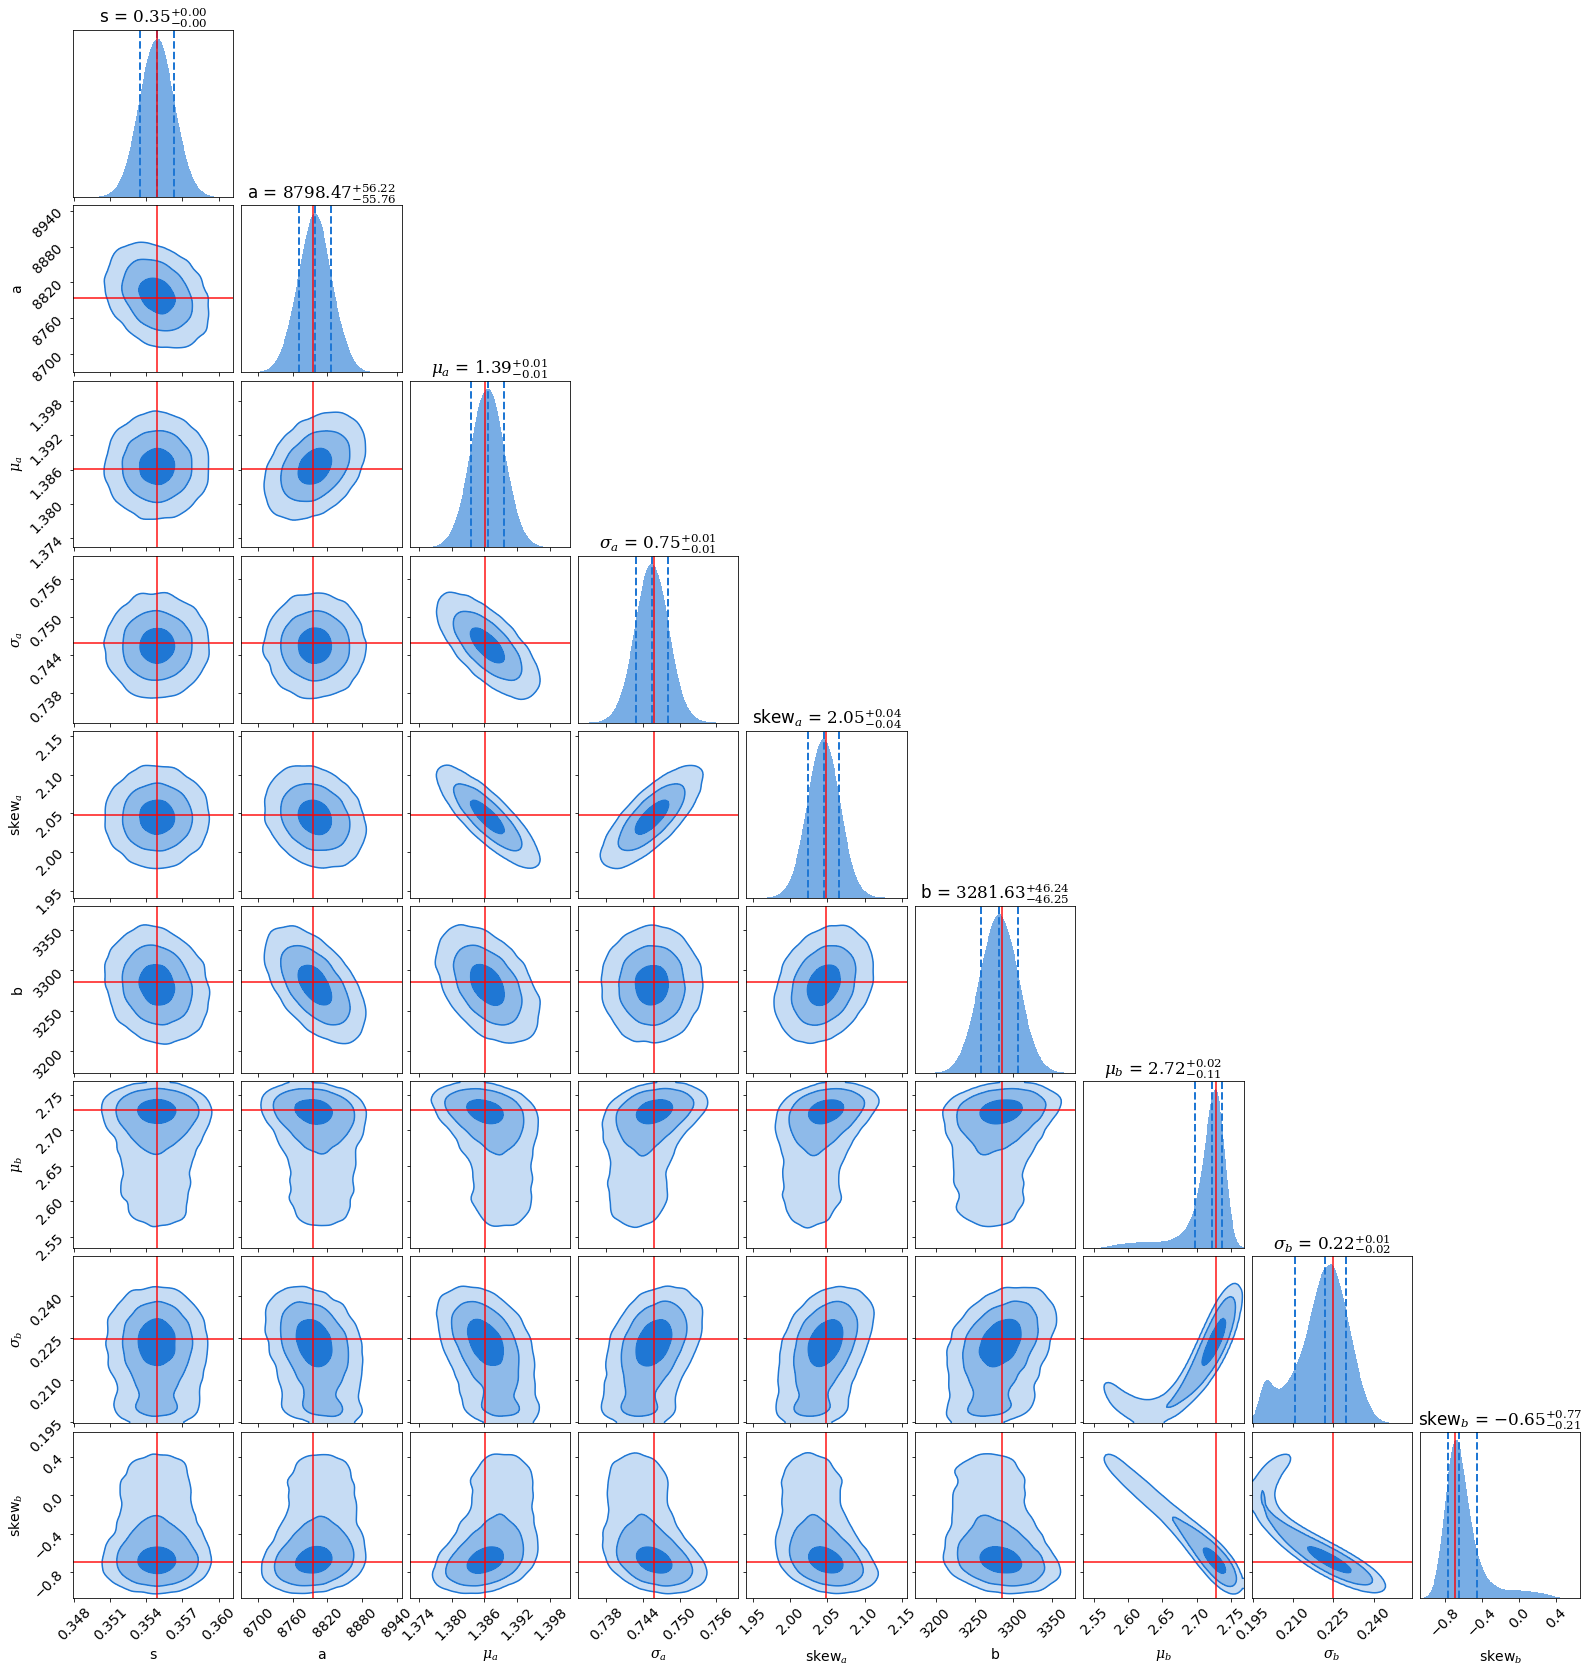

In [26]:
pc.plotting.corner(V2_results2, 
                   labels=labels2_tri, 
                   dims=range(len(labels2_tri)), 
                   show_titles=True, 
                   quantiles=[0.16, 0.5, 0.84])

In [27]:
lnzM2_V2 = V2_results2['logz'][-1]
lnzM1_V2

-4822.731347962

In [28]:
V2_ur_bestfit2 = np.mean(V2_results2['samples'], axis=0)

V2_ur_bestfit2

array([ 3.54884306e-01,  8.79849117e+03,  1.38657647e+00,  7.45464859e-01,
        2.04513391e+00,  3.28171488e+03,  2.71433372e+00,  2.20574396e-01,
       -5.93174341e-01])

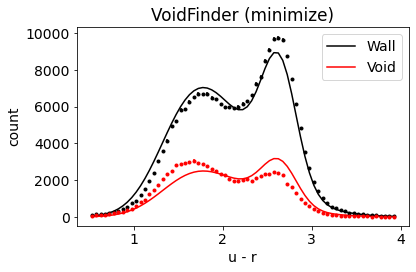

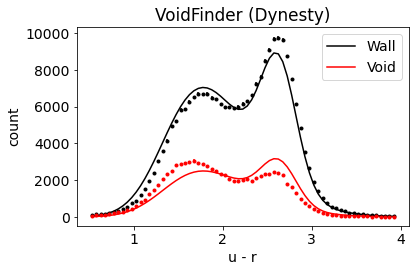

In [29]:
Model_2_plot(V2_ur_bestfit2, 
             ur_NSA[wall_vf], 
             ur_NSA[void_vf], 
             ur_bins, 
             3, 
             xlabel_text='u - r', 
             title_text=r'$V$^2$ $\mathcal{M}_2$ (pocoMC)')

### Calculate Bayes factor

In [10]:
lnB12_V2 = lnzM1_V2 - lnzM2_V2

B12_V2 = np.exp(lnB12_V2)

print('V2 u-r: B12 = {:.3g}; log(B12) = {:.3f}'.format(B12_V2, lnB12_V2*np.log10(np.exp(1))))

NameError: name 'lnzM1_V2' is not defined

## VoidFinder

### 1-parent model

In [44]:
temp_infile = open('pocoMC_results/sampler_results_M1_u-r_VoidFinder.pickle', 'rb')
VF_results1 = pickle.load(temp_infile)
temp_infile.close()

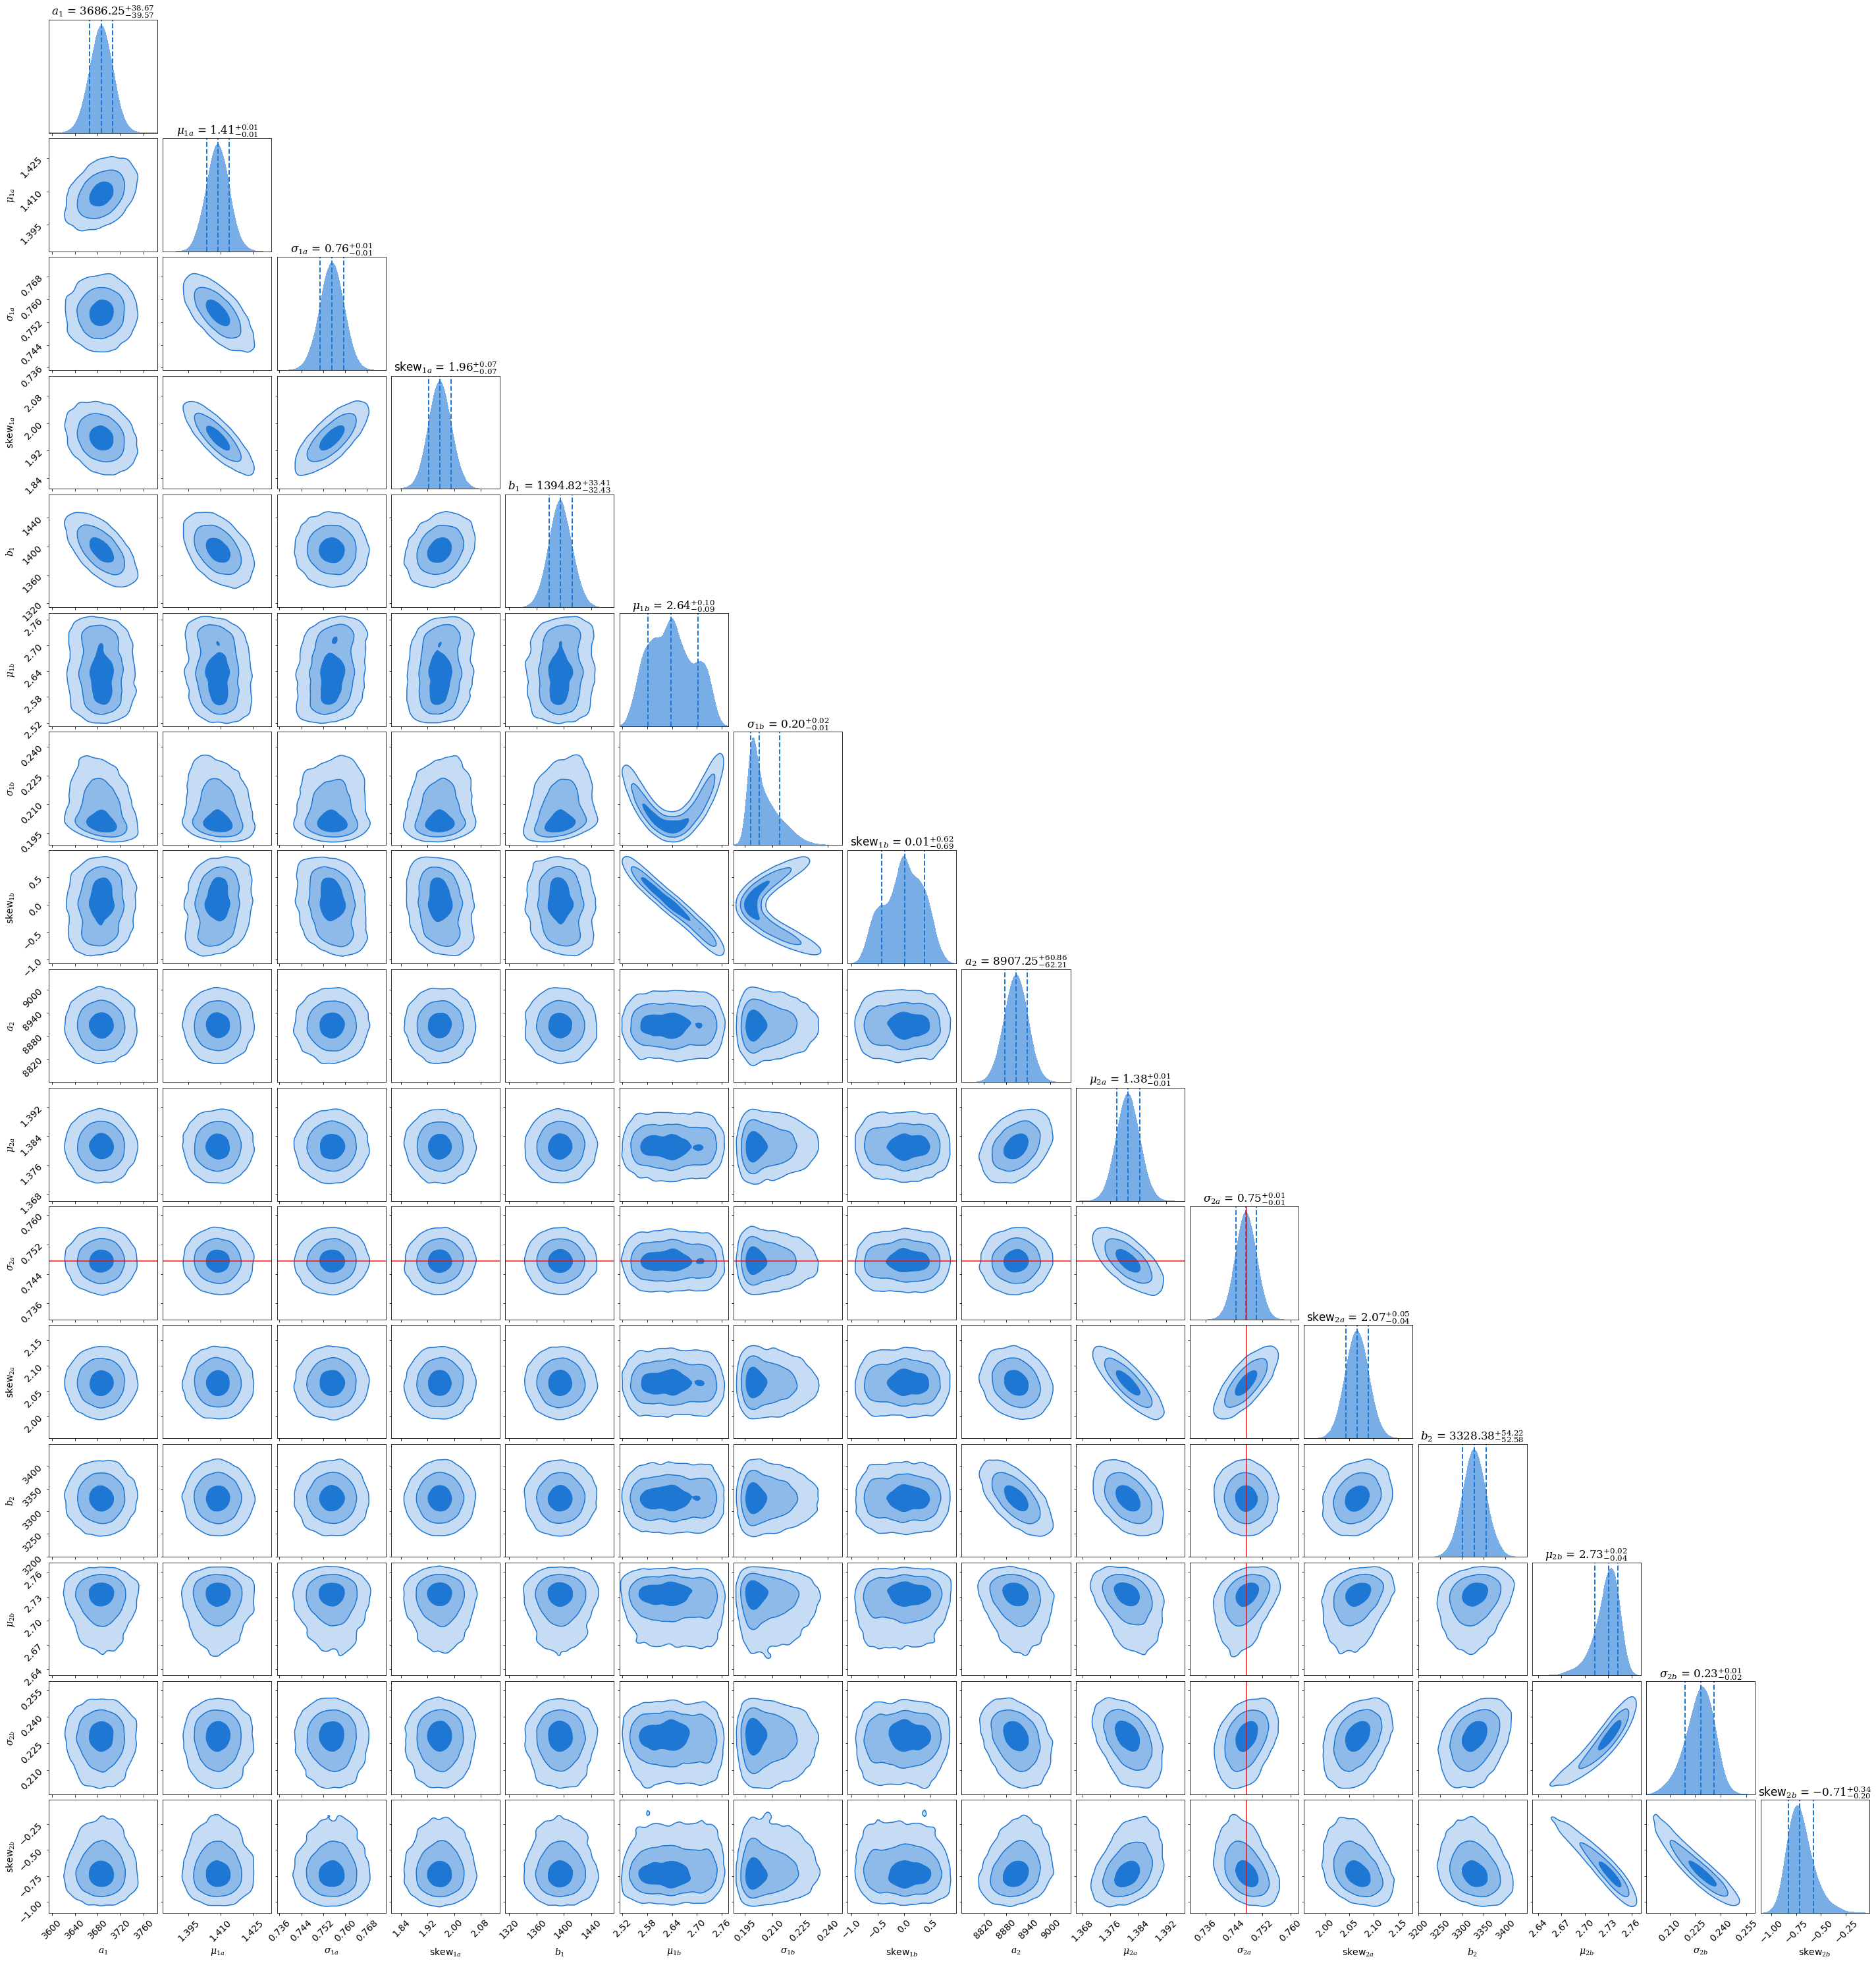

In [45]:
pc.plotting.corner(VF_results1, 
                   labels=labels1_bi, 
                   dims=range(len(labels1_bi)), 
                   show_titles=True, 
                   quantiles=[0.16, 0.5, 0.84])

In [47]:
lnzM1_VF = VF_results1['logz'][-1]
lnzM1_VF

-1236.864949723582

In [48]:
VF_bestfit1 = np.mean(VF_results1['samples'], axis=0)

VF_bestfit1

array([ 3.68597803e+03,  1.40871329e+00,  7.55199369e-01,  1.95738665e+00,
        1.39506856e+03,  2.64010666e+00,  2.05260318e-01, -5.40654204e-03,
        8.90703670e+03,  1.38112831e+00,  7.47501489e-01,  2.06634328e+00,
        3.32860162e+03,  2.72777985e+00,  2.27578066e-01, -6.98066746e-01])

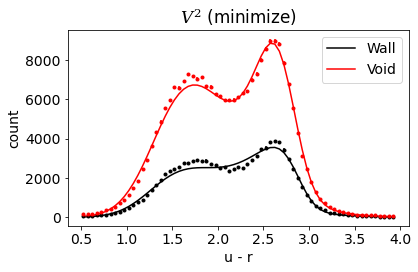

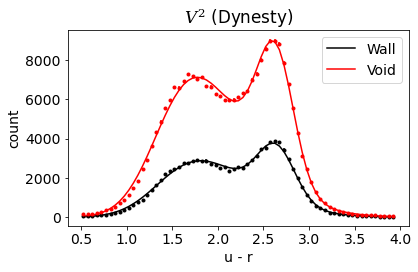

In [49]:
Model_2_plot(VF_bestfit1, 
             ur_NSA[wall_vf], 
             ur_NSA[void_vf], 
             ur_bins, 
             3, 
             xlabel_text='u - r', 
             title_text=r'VoidFinder $\mathcal{M}_1$ (pocoMC)')

### 2-parent model

In [50]:
temp_infile = open('pocoMC_results/sampler_results_M2_u-r_VoidFinder.pickle', 'rb')
VF_results2 = pickle.load(temp_infile)
temp_infile.close()

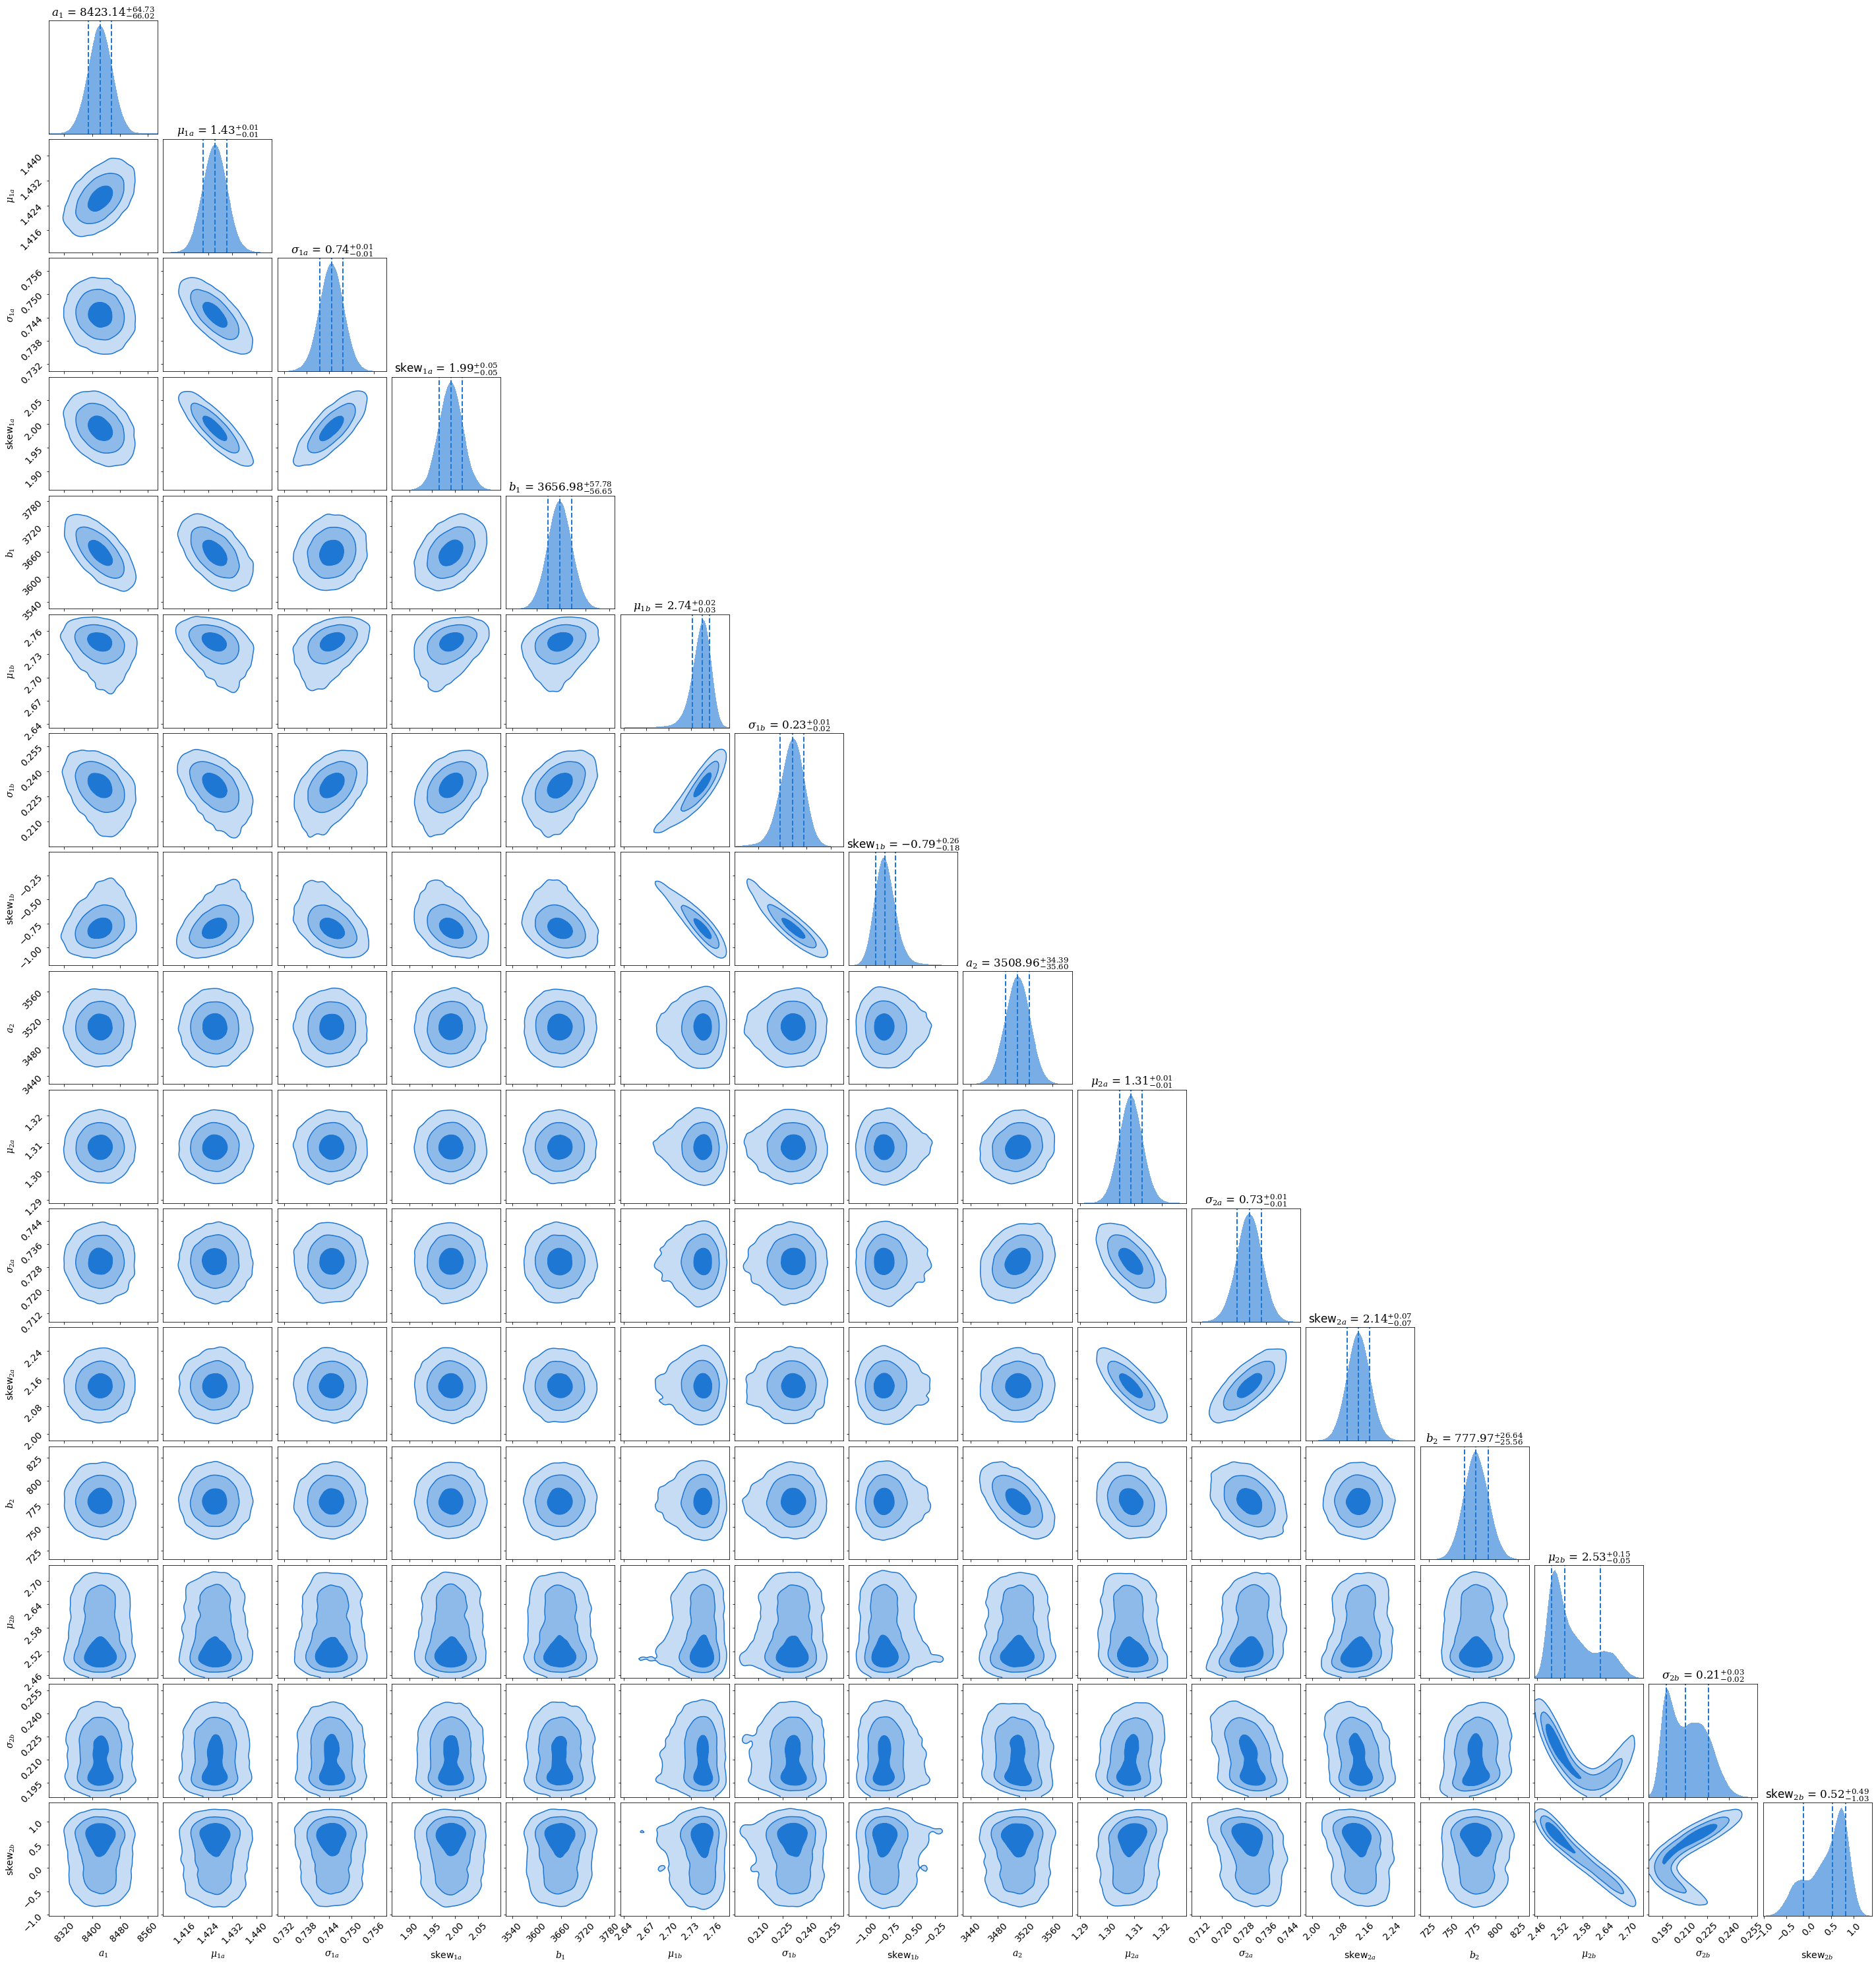

In [51]:
pc.plotting.corner(VF_results2, 
                   labels=labels2_bi, 
                   dims=range(len(labels2_bi)), 
                   show_titles=True, 
                   quantiles=[0.16, 0.5, 0.84])

In [52]:
lnzM2_VF = VF_results2['logz'][-1]
lnzM2_VF

-1240.4597709626619

In [53]:
VF_bestfit2 = np.mean(VF_results2['samples'], axis=0)

VF_bestfit2

array([ 8.42304840e+03,  1.42625480e+00,  7.44721673e-01,  1.99088888e+00,
        3.65725346e+03,  2.74335004e+00,  2.30875725e-01, -7.84145199e-01,
        3.50882866e+03,  1.30871050e+00,  7.29916878e-01,  2.13933530e+00,
        7.78138019e+02,  2.55216711e+00,  2.11541579e-01,  4.10173946e-01])

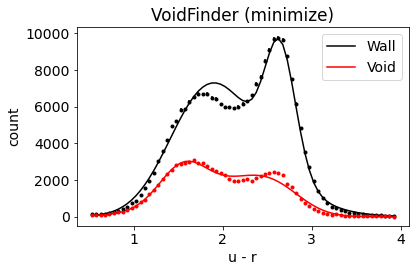

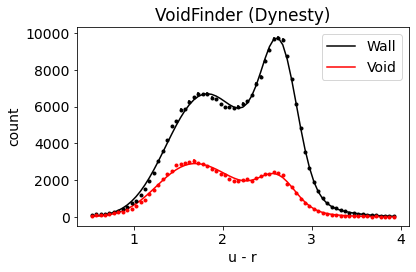

In [54]:
Model_2_plot(VF_bestfit2, 
             ur_NSA[wall_vf], 
             ur_NSA[void_vf], 
             ur_bins, 
             3, 
             xlabel_text='u - r', 
             title_text=r'VoidFinder $\mathcal{M}_2$ (pocoMC)')

### Bayes Factor

In [56]:
lnB12_VF = lnzM1_VF - lnzM2_VF

B12_VF = np.exp(lnB12_VF)

print('VoidFinder u-r: B12 = {:.3g}; log(B12) = {:.3f}'.format(B12_VF, lnB12_VF*np.log10(np.exp(1))))

VoidFinder (u - r): B12 = 0; log(B12) = -1555.761


So both VoidFinder and V$^2$ favor $\mathcal{M}_2$, in which the two data sets come from different parent distributions, although VoidFinder favors it much more than V$^2$.